In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sympy as smp
import matplotlib.animation as animation

In [2]:
from toy_problems import QuickUnion

In [3]:
n = 20 

In [4]:
x = np.linspace(0, 3, n)
f = 2*np.exp(-2*x)
F = 1-np.exp(-2*x)

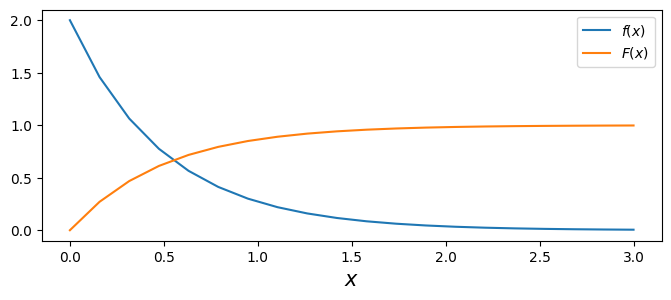

In [5]:
plt.figure(figsize=(8, 3))
plt.plot(x, f, label=f'$f(x)$')
plt.plot(x, F, label=f'$F(x)$')
plt.legend()
plt.xlabel('$x$', fontsize=15)
plt.legend()
plt.show()

In [6]:
Us = np.random.rand(n ** 2)
F_inv_Us = -np.log(1-Us)/2

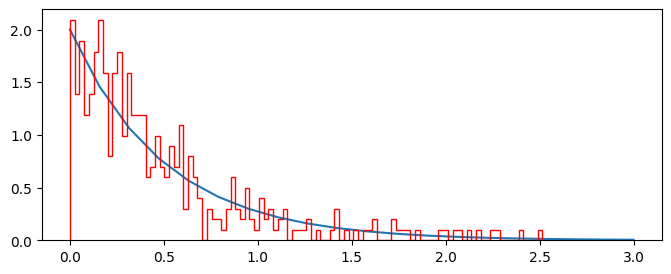

In [7]:
plt.figure(figsize=(8, 3))
plt.plot(x, f, label=r'$f(x)$')
plt.hist(F_inv_Us, histtype='step', color='red', bins=100, density='norm', label=r'$F^{-1}(U)$')
plt.show()

In [8]:
rs = np.reshape(F_inv_Us, (n,-1))

In [9]:
pgrid = rs < 0.5

In [40]:
%matplotlib inline


# fps = 30
# nseconds = 5

# def animate(i):
#   im.set_array(snapshots[i])
#   return [im]

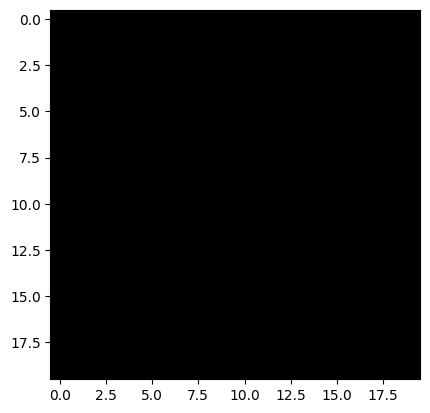

In [71]:
uf = QuickUnion(n**2)
idx_grid = np.arange(pgrid.shape[0]**2).reshape(pgrid.shape[0], -1)
pgrid_solv = np.zeros((len(pgrid), len(pgrid), 3), dtype=np.uint8)
fig, ax = plt.subplots()
im = plt.imshow(pgrid_solv, animated=True)

# for irow in range(0, pgrid.shape[0]):
#     if irow == pgrid.shape[0] - 1:
#         break

#     p_row = pgrid[irow]
#     p_i_row = idx_grid[irow]
#     q_row = pgrid[irow + 1]
#     q_i_row = idx_grid[irow + 1]

#     for i, p in enumerate(p_i_row):
#         # if the cell is not open, skip
#         if not p_row[i]:
#             pgrid_solv[irow, i] = (0, 0, 0)
#             continue
#         elif p_row[i] and not q_row[i]:
#             pgrid_solv[irow, i] = (0, 0, 255)

#         # if the cell below is open, connect
#         if q_row[i]:
#             uf.union(p, q_i_row[i])
#             pgrid_solv[irow, i] = (0, 0, 255)
#             pgrid_solv[irow + 1, i] = (0, 0, 255)
            
#             # keep connecting left and right until we find a closed cell
#             l = i - 1
#             r = i + 1
#             while l >= 0 and p_row[l]:
#                 uf.union(p, p_i_row[l])
#                 pgrid_solv[irow, l] = (0, 0, 255)
#                 l -= 1
#             while r < len(p_row) and p_row[r]:
#                 uf.union(p, p_i_row[r])
#                 pgrid_solv[irow, r] = (0, 0, 255)
#                 r += 1
        # snapshots.append(pgrid_solv.copy())

def perc_animated(frame):
    irow = frame
    out = pgrid_solv.copy()
    if irow == pgrid.shape[0] - 1:
        return [im]
    p_row = pgrid[irow]
    p_i_row = idx_grid[irow]
    q_row = pgrid[irow + 1]
    q_i_row = idx_grid[irow + 1]

    for i, p in enumerate(p_i_row):
        # if the cell is not open, skip
        if not p_row[i]:
            out[irow, i] = (0, 0, 0)
            continue
        elif p_row[i] and not q_row[i]:
            out[irow, i] = (0, 0, 255)

        # if the cell below is open, connect
        if q_row[i]:
            uf.union(p, q_i_row[i])
            out[irow, i] = (0, 0, 255)
            out[irow + 1, i] = (0, 0, 255)
            
            # keep connecting left and right until we find a closed cell
            l = i - 1
            r = i + 1
            while l >= 0 and p_row[l]:
                uf.union(p, p_i_row[l])
                out[irow, l] = (0, 0, 255)
                l -= 1
            while r < len(p_row) and p_row[r]:
                uf.union(p, p_i_row[r])
                out[irow, r] = (0, 0, 255)
                r += 1
    im.set_data(out)
    return [im]
    

# plt.figure(figsize=(20, 20))
# ax.matshow(pgrid_solv)
# # for p, x in np.ndenumerate(idx_grid):
# #     ax.text(p[1], p[0], x, color="red", size="x-small", va='center', ha='center')
# plt.show()

In [72]:
fig = plt.figure( figsize=(20,20) )
anim = animation.FuncAnimation(fig, perc_animated, frames=np.arange(0, pgrid.shape[0]), interval=50)
anim.save('test_anim.mp4', fps=4, extra_args=['-vcodec', 'libx264'])

<Figure size 2000x2000 with 0 Axes>

In [42]:
uf.connected(10, 398)

True

In [29]:
%matplotlib notebook

import random
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import matplotlib.animation as animation


fps = 30
nSeconds = 5
snapshots = [ np.random.rand(5,5) for _ in range( nSeconds * fps ) ]

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(8,8) )

a = snapshots[0]
im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_array(snapshots[i])
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )

anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

print('Done!')

<IPython.core.display.Javascript object>

......Done!
